In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn import metrics
import datetime as dt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

from xgboost import XGBClassifier, plot_importance

import seaborn as sns

import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.io as pio

import matplotlib.pyplot as plt

In [2]:
#there are issues with the 'tot_secs','std_tot_secs','mean_tot_secs' columns with values going into large negative values
#maybe an accuracy issue when summing up too large numbers going into overflow 
#take them out for now, maybe it could also work taking out outliers, median and q25, q75 values 
#seem to make sense so keep them at the moment


df_user_all_info_agg_for_model=pd.read_csv("df_user_log__NEW__transfer__membership__aggregated_per_user__train_v2_members.csv")
df_user_all_info_agg_for_model=df_user_all_info_agg_for_model.drop(columns=["Unnamed: 0",
                                                                           'tot_secs','std_tot_secs','mean_tot_secs',])

for col in df_user_all_info_agg_for_model.columns:
    print(col,'na/dtype',df_user_all_info_agg_for_model[col].isna().sum(),df_user_all_info_agg_for_model[col].dtype)
df_user_all_info_agg_for_model

msno na/dtype 0 object
city na/dtype 0 int64
bd na/dtype 0 int64
gender na/dtype 467907 object
registered_via na/dtype 0 int64
registration_init_time na/dtype 0 int64
registration_init_time_as_dt na/dtype 0 object
activity_duration na/dtype 0 int64
last_date_active na/dtype 0 object
n_active_days na/dtype 0 int64
sum_num_25 na/dtype 0 int64
sum_num_50 na/dtype 0 int64
sum_num_75 na/dtype 0 int64
sum_num_985 na/dtype 0 int64
sum_num_100 na/dtype 0 int64
sum_num_unq na/dtype 0 int64
num_valid_tot_secs na/dtype 0 float64
mean_num_25 na/dtype 0 float64
median_num_25 na/dtype 0 float64
q25_num_25 na/dtype 0 float64
q75_num_25 na/dtype 0 float64
std_num_25 na/dtype 9331 float64
median_num_50 na/dtype 0 float64
std_num_50 na/dtype 9331 float64
median_num_75 na/dtype 0 float64
std_num_75 na/dtype 9331 float64
median_num_985 na/dtype 0 float64
std_num_985 na/dtype 9331 float64
mean_num_100 na/dtype 0 float64
median_num_100 na/dtype 0 float64
q25_num_100 na/dtype 0 float64
q75_num_100 na/dtype 0

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt,activity_duration,last_date_active,n_active_days,...,mode_delta_trans_date,min_delta_amount_paid,max_delta_amount_paid,mode_delta_amount_paid,duration_max_memb_exp_min_trans_date_effective,first_cancel_membership_expire_date,last_cancel_membership_expire_date,first_auto_renew_transaction,last_auto_renew_transaction,is_churn
0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,2011-09-14,820,2017-03-31,763,...,31.0,-20.0,20.0,0.0,846.0,2016-11-28,2016-11-28,2015-01-03,2017-03-27,0
1,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,20110916,2011-09-16,781,2017-03-31,18,...,31.0,0.0,0.0,0.0,672.0,NaN,NaN,2015-02-17,2017-03-31,0
2,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,20110918,2011-09-18,817,2017-03-30,354,...,31.0,0.0,0.0,0.0,820.0,NaN,NaN,2015-01-27,2017-03-27,0
3,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,0,NaN,7,20110918,2011-09-18,817,2017-03-28,295,...,31.0,0.0,0.0,0.0,822.0,NaN,NaN,2015-01-26,2017-03-26,1
4,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,4,28,female,9,20110920,2011-09-20,761,2017-03-31,37,...,31.0,0.0,31.0,0.0,274.0,2015-06-07,2015-06-07,2015-03-31,2017-03-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855131,dz8iQV2eZCBZo1DjKL7OifsiyzGf3xyMaCFDOJHVeyc=,1,0,NaN,7,20151020,2015-10-20,528,2017-03-31,108,...,31.0,0.0,0.0,0.0,547.0,NaN,NaN,2015-10-20,2017-03-19,0
855132,OL6joplCKThE1pZD+AQDnj3kZiC45qzpndlDIRSyPQI=,1,0,NaN,7,20151020,2015-10-20,528,2017-03-31,396,...,31.0,0.0,0.0,0.0,548.0,NaN,NaN,2015-10-20,2017-03-20,0
855133,O11rAa17ANM6DGMMVb9L2vwCQFv/S6SR3SDB1nGuOAc=,1,0,NaN,7,20151020,2015-10-20,525,2017-03-31,273,...,31.0,0.0,0.0,0.0,548.0,NaN,NaN,2015-10-20,2017-03-20,0
855134,tyoRqQ72Y2oCcqvdaIxG8T0Hs9DZvuuM8IeTwhxtdBQ=,6,26,female,7,20151020,2015-10-20,528,2017-03-31,417,...,31.0,-99.0,149.0,0.0,536.0,2015-12-09,2015-12-09,2015-10-20,2017-03-08,0


In [3]:
df_user_all_info_agg_for_model['registration_init_time_as_dt']=pd.to_datetime(df_user_all_info_agg_for_model["registration_init_time_as_dt"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['max_date_trans']=pd.to_datetime(df_user_all_info_agg_for_model["max_date_trans"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['min_date_trans']=pd.to_datetime(df_user_all_info_agg_for_model["min_date_trans"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['max_memb_exp']=pd.to_datetime(df_user_all_info_agg_for_model["max_memb_exp"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['first_cancel_membership_expire_date']=pd.to_datetime(df_user_all_info_agg_for_model["first_cancel_membership_expire_date"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['last_cancel_membership_expire_date']=pd.to_datetime(df_user_all_info_agg_for_model["last_cancel_membership_expire_date"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['first_auto_renew_transaction']=pd.to_datetime(df_user_all_info_agg_for_model["first_auto_renew_transaction"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['last_auto_renew_transaction']=pd.to_datetime(df_user_all_info_agg_for_model["last_auto_renew_transaction"], format='%Y-%m-%d', errors='ignore')

for col in df_user_all_info_agg_for_model.columns:
    print(col,'na/dtype',df_user_all_info_agg_for_model[col].isna().sum(),df_user_all_info_agg_for_model[col].dtype)

msno na/dtype 0 object
city na/dtype 0 int64
bd na/dtype 0 int64
gender na/dtype 467907 object
registered_via na/dtype 0 int64
registration_init_time na/dtype 0 int64
registration_init_time_as_dt na/dtype 0 datetime64[ns]
activity_duration na/dtype 0 int64
last_date_active na/dtype 0 object
n_active_days na/dtype 0 int64
sum_num_25 na/dtype 0 int64
sum_num_50 na/dtype 0 int64
sum_num_75 na/dtype 0 int64
sum_num_985 na/dtype 0 int64
sum_num_100 na/dtype 0 int64
sum_num_unq na/dtype 0 int64
num_valid_tot_secs na/dtype 0 float64
mean_num_25 na/dtype 0 float64
median_num_25 na/dtype 0 float64
q25_num_25 na/dtype 0 float64
q75_num_25 na/dtype 0 float64
std_num_25 na/dtype 9331 float64
median_num_50 na/dtype 0 float64
std_num_50 na/dtype 9331 float64
median_num_75 na/dtype 0 float64
std_num_75 na/dtype 9331 float64
median_num_985 na/dtype 0 float64
std_num_985 na/dtype 9331 float64
mean_num_100 na/dtype 0 float64
median_num_100 na/dtype 0 float64
q25_num_100 na/dtype 0 float64
q75_num_100 na

In [4]:
y=df_user_all_info_agg_for_model["is_churn"]
X=df_user_all_info_agg_for_model.drop(columns=['msno','is_churn','city','bd','gender','max_date_trans',
                                                 'min_date_trans','max_memb_exp','last_date_active',
                                                 'num_breaks_members_exp_trans','num_breaks_30plus_days',
                                                 'min_delta_members_exp_prev_trans_date','max_delta_members_exp_prev_trans_date',
                                                 'mean_delta_members_exp_prev_trans_date','median_delta_members_exp_prev_trans_date',
                                                 'mode_delta_members_exp_prev_trans_date','min_delta_trans_date',
                                                 'max_delta_trans_date','mean_delta_trans_date','median_delta_trans_date',
                                                 'mode_delta_trans_date','min_delta_amount_paid',
                                                 'max_delta_amount_paid','mode_delta_amount_paid',
                                                 'registration_init_time','registration_init_time_as_dt',
                                                 'last_auto_renew_transaction','first_auto_renew_transaction',
                                                 'last_cancel_membership_expire_date',
                                                 'first_cancel_membership_expire_date','last_auto_renew_transaction'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
X_train

,registered_via,activity_duration,n_active_days,sum_num_25,sum_num_50,sum_num_75,sum_num_985,sum_num_100,sum_num_unq,num_valid_tot_secs,...,max_payment_plan_days,mean_payment_plan_days,mode_payment_plan_days,num_payment_plans,total_auto_renew,total_is_cancel,duration_max_memb_exp_min_trans_date,duration_max_min_trans_date,sum_delta_members_exp_prev_trans_date,duration_max_memb_exp_min_trans_date_effective
63861,3,818,351,1409,664,687,333,10374,11176,351.0,...,31,30.181818,30,2,22,2,816,785,146.0,670.0
468106,9,776,698,11399,2899,2086,1060,51668,51291,697.0,...,30,30.000000,30,1,0,0,791,761,82.0,709.0
608894,7,54,31,369,67,36,37,807,859,31.0,...,30,30.000000,30,1,11,0,334,303,0.0,334.0
30386,4,479,468,4711,539,411,399,10268,13418,468.0,...,120,36.923077,30,2,0,0,494,464,5.0,489.0
28579,9,96,78,261,50,49,71,3161,2722,78.0,...,30,30.000000,30,1,5,0,128,98,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,7,17,4,51,10,3,5,97,102,4.0,...,30,30.000000,30,1,9,0,273,242,0.0,273.0
365838,7,275,110,363,106,67,72,4698,3819,110.0,...,30,30.000000,30,1,10,0,304,273,0.0,304.0
131932,9,126,74,81,63,38,34,1186,1193,74.0,...,30,25.400000,30,2,0,0,134,103,5.0,129.0
671155,3,0,1,23,0,0,0,3,8,1.0,...,31,30.148148,30,2,27,0,820,790,0.0,820.0


In [6]:
df_user_all_info_agg_for_model_sel=df_user_all_info_agg_for_model[df_user_all_info_agg_for_model['n_active_days']>1]

y_sel=df_user_all_info_agg_for_model_sel["is_churn"]
X_sel=df_user_all_info_agg_for_model_sel.drop(columns=[
                                                 'msno','is_churn','city','bd','gender','max_date_trans',
                                                 'min_date_trans','max_memb_exp','last_date_active',
                                                 'num_breaks_members_exp_trans','num_breaks_30plus_days',
                                                 'min_delta_members_exp_prev_trans_date','max_delta_members_exp_prev_trans_date',
                                                 'mean_delta_members_exp_prev_trans_date','median_delta_members_exp_prev_trans_date',
                                                 'mode_delta_members_exp_prev_trans_date','min_delta_trans_date',
                                                 'max_delta_trans_date','mean_delta_trans_date','median_delta_trans_date',
                                                 'mode_delta_trans_date','min_delta_amount_paid',
                                                 'max_delta_amount_paid','mode_delta_amount_paid',
                                                 'registration_init_time','registration_init_time_as_dt',
                                                 'last_auto_renew_transaction','first_auto_renew_transaction',
                                                 'last_cancel_membership_expire_date',
                                                 'first_cancel_membership_expire_date','last_auto_renew_transaction'])

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y_sel, test_size=0.30, random_state=42)

In [7]:
X_train_sel

,registered_via,activity_duration,n_active_days,sum_num_25,sum_num_50,sum_num_75,sum_num_985,sum_num_100,sum_num_unq,num_valid_tot_secs,...,max_payment_plan_days,mean_payment_plan_days,mode_payment_plan_days,num_payment_plans,total_auto_renew,total_is_cancel,duration_max_memb_exp_min_trans_date,duration_max_min_trans_date,sum_delta_members_exp_prev_trans_date,duration_max_memb_exp_min_trans_date_effective
302868,7,604,177,1718,566,360,225,3308,4846,177.0,...,30,30.0,30,1,21,0,639,608,0.0,639.0
323002,7,374,297,1921,472,316,287,30684,10653,281.0,...,30,30.0,30,1,14,1,394,369,0.0,394.0
531807,7,513,393,2847,908,613,633,7377,7444,393.0,...,30,30.0,30,1,17,0,547,517,30.0,517.0
769191,7,230,101,559,82,63,61,644,1096,101.0,...,30,30.0,30,1,8,0,242,211,0.0,242.0
596889,7,118,101,217,60,46,47,1385,982,101.0,...,30,30.0,30,1,5,0,150,119,0.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261612,7,28,26,51,13,17,13,266,235,26.0,...,30,30.0,30,1,2,0,58,27,0.0,58.0
369447,7,313,217,203,132,123,240,13201,8974,217.0,...,30,30.0,30,1,11,0,335,304,0.0,335.0
133151,9,290,231,860,196,150,160,7583,6887,231.0,...,30,30.0,30,1,11,1,306,276,1.0,305.0
678356,7,385,202,369,114,88,60,1719,2068,202.0,...,30,30.0,30,1,15,1,395,364,0.0,395.0


In [8]:
for col in X_train_sel.columns:
    print(col,X_train_sel[col].isna().sum())

registered_via 0
activity_duration 0
n_active_days 0
sum_num_25 0
sum_num_50 0
sum_num_75 0
sum_num_985 0
sum_num_100 0
sum_num_unq 0
num_valid_tot_secs 0
mean_num_25 0
median_num_25 0
q25_num_25 0
q75_num_25 0
std_num_25 0
median_num_50 0
std_num_50 0
median_num_75 0
std_num_75 0
median_num_985 0
std_num_985 0
mean_num_100 0
median_num_100 0
q25_num_100 0
q75_num_100 0
std_num_100 0
median_tot_secs 0
q25_tot_secs 0
q75_tot_secs 0
n_max_break 0
n_min_break 0
n_mean_break 0
n_mode_break 0
n_median_break 0
n_max_break_last 0
n_min_break_last 0
n_mean_break_last 0
n_mode_break_last 0
n_median_break_last 0
n_active_days_last 0
sum_num_25_last 0
sum_num_50_last 0
sum_num_75_last 0
sum_num_985_last 0
sum_num_100_last 0
sum_num_unq_last 0
tot_secs_last 0
num_valid_tot_secs_last 0
mean_num_25_last 0
median_num_25_last 0
q25_num_25_last 0
q75_num_25_last 0
std_num_25_last 26733
median_num_50_last 0
std_num_50_last 26733
median_num_75_last 0
std_num_75_last 26733
median_num_985_last 0
std_num_98

In [10]:
weight_pos_class=len(y_train[y_train==0])/len(y_train[y_train==1])
weight_pos_class

9.565989444513088

In [11]:
xgb = XGBClassifier(scale_pos_weight = weight_pos_class,  random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=9.565989444513088,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [12]:
scores_best=np.mean(cross_val_score(xgb, X_train, y_train, cv=5, scoring='f1'))
print(scores_best)
print(f'Scores: {classification_report(y_test, xgb.predict(X_test))}')

0.653890357150239
Scores:               precision    recall  f1-score   support

           0       0.99      0.91      0.95    232278
           1       0.51      0.91      0.65     24263

    accuracy                           0.91    256541
   macro avg       0.75      0.91      0.80    256541
weighted avg       0.94      0.91      0.92    256541



In [13]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ['logloss','auc']

xgb.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, verbose=True)

results = xgb.evals_result()

[0]	validation_0-logloss:0.53895	validation_0-auc:0.93609	validation_1-logloss:0.53929	validation_1-auc:0.93509
[1]	validation_0-logloss:0.45234	validation_0-auc:0.94459	validation_1-logloss:0.45304	validation_1-auc:0.94335
[2]	validation_0-logloss:0.39851	validation_0-auc:0.94750	validation_1-logloss:0.39932	validation_1-auc:0.94621
[3]	validation_0-logloss:0.36395	validation_0-auc:0.94888	validation_1-logloss:0.36489	validation_1-auc:0.94763
[4]	validation_0-logloss:0.33889	validation_0-auc:0.95057	validation_1-logloss:0.33981	validation_1-auc:0.94941
[5]	validation_0-logloss:0.32013	validation_0-auc:0.95408	validation_1-logloss:0.32112	validation_1-auc:0.95288
[6]	validation_0-logloss:0.30677	validation_0-auc:0.95514	validation_1-logloss:0.30794	validation_1-auc:0.95383
[7]	validation_0-logloss:0.29562	validation_0-auc:0.95694	validation_1-logloss:0.29703	validation_1-auc:0.95552
[8]	validation_0-logloss:0.28781	validation_0-auc:0.95790	validation_1-logloss:0.28938	validation_1-auc:

[73]	validation_0-logloss:0.19733	validation_0-auc:0.97899	validation_1-logloss:0.20705	validation_1-auc:0.97249
[74]	validation_0-logloss:0.19698	validation_0-auc:0.97909	validation_1-logloss:0.20683	validation_1-auc:0.97249
[75]	validation_0-logloss:0.19632	validation_0-auc:0.97924	validation_1-logloss:0.20631	validation_1-auc:0.97259
[76]	validation_0-logloss:0.19622	validation_0-auc:0.97926	validation_1-logloss:0.20627	validation_1-auc:0.97257
[77]	validation_0-logloss:0.19512	validation_0-auc:0.97951	validation_1-logloss:0.20525	validation_1-auc:0.97278
[78]	validation_0-logloss:0.19407	validation_0-auc:0.97972	validation_1-logloss:0.20426	validation_1-auc:0.97299
[79]	validation_0-logloss:0.19358	validation_0-auc:0.97988	validation_1-logloss:0.20398	validation_1-auc:0.97300
[80]	validation_0-logloss:0.19353	validation_0-auc:0.97990	validation_1-logloss:0.20396	validation_1-auc:0.97301
[81]	validation_0-logloss:0.19318	validation_0-auc:0.97997	validation_1-logloss:0.20371	validati

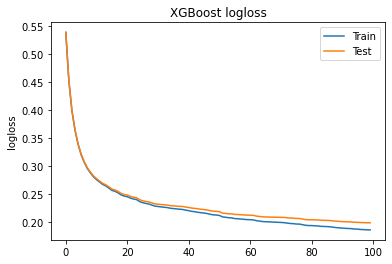

In [14]:
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('logloss')
plt.title('XGBoost logloss')
plt.show()

In [ ]:
scores_best_neg_log_loss=np.mean(cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_log_loss'))
print(scores_best_neg_log_loss)
print(f'Scores: {classification_report(y_test, xgb.predict(X_test))}')

plotting city


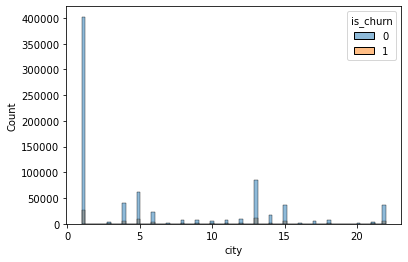

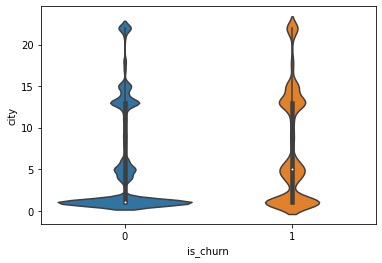

plotting bd


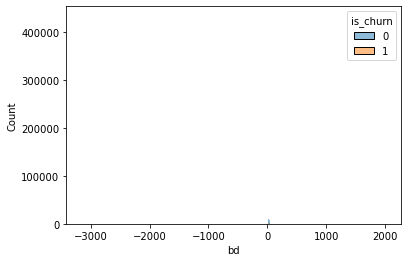

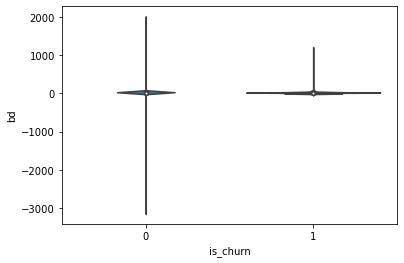

plotting registered_via


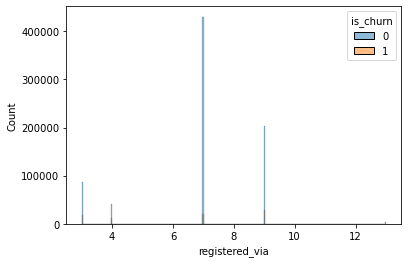

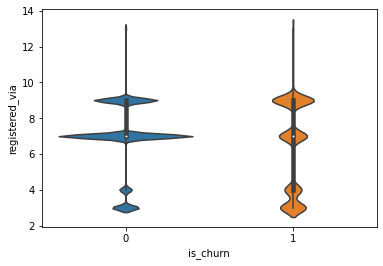

plotting activity_duration


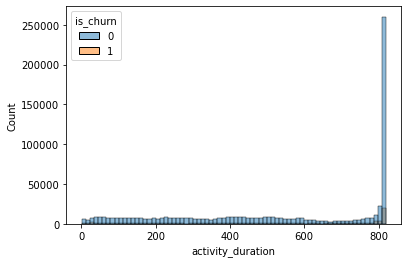

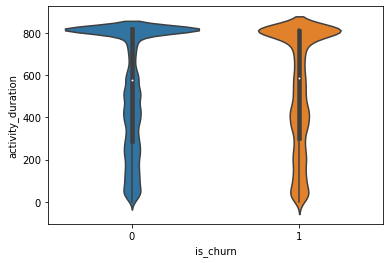

plotting n_active_days


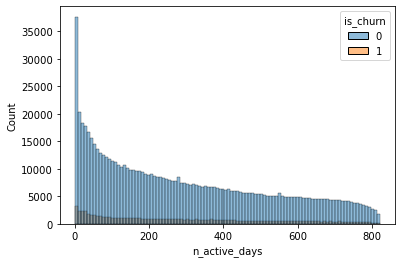

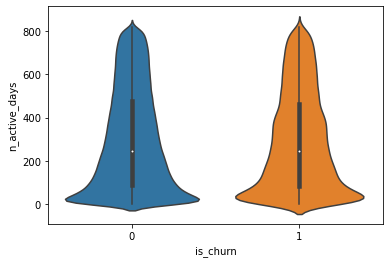

plotting sum_num_25


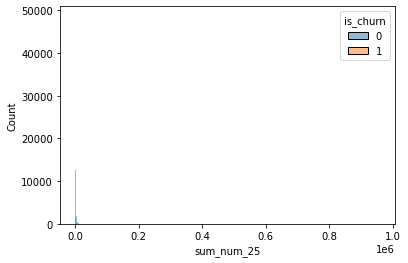

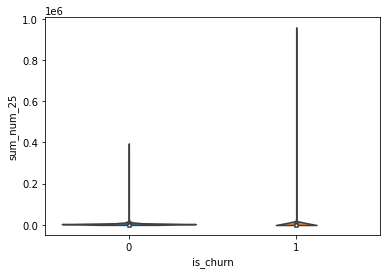

plotting sum_num_50


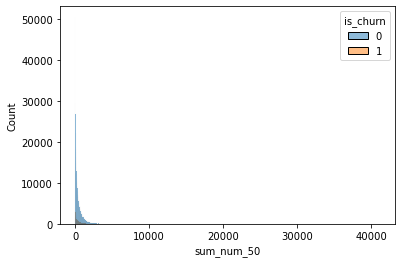

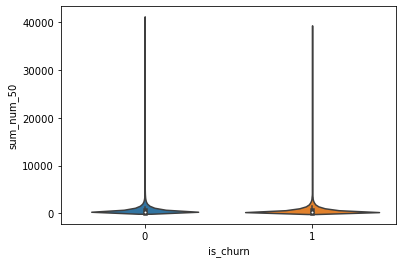

plotting sum_num_75


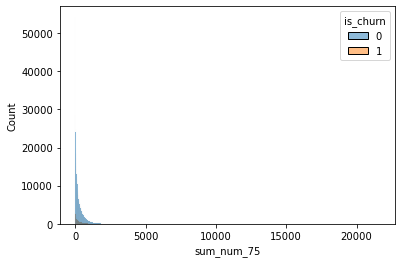

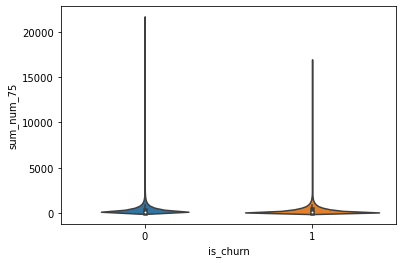

plotting sum_num_985


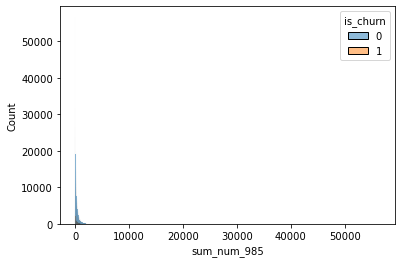

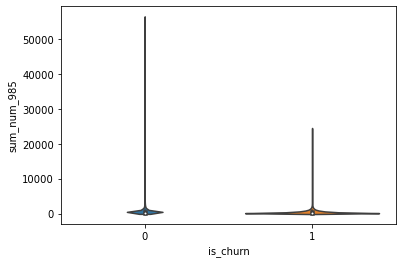

plotting sum_num_100


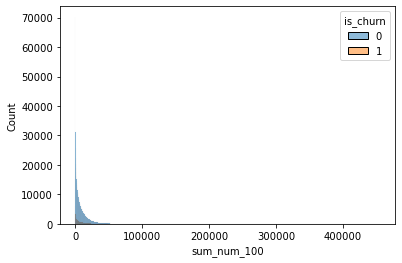

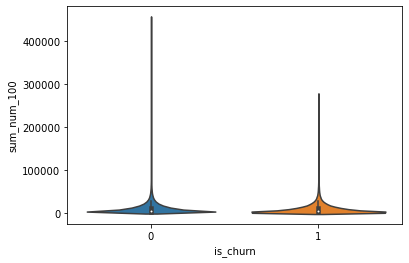

plotting sum_num_unq


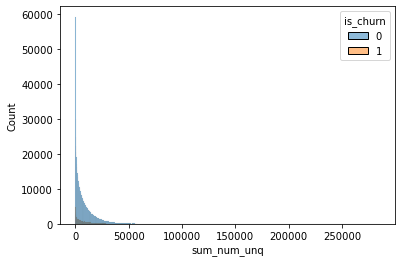

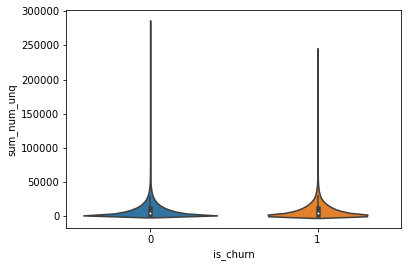

plotting mean_num_25


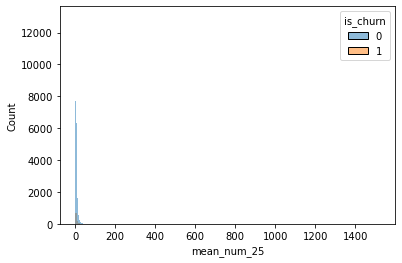

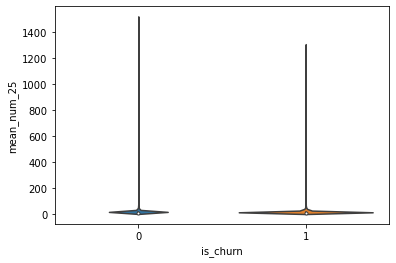

plotting median_num_25


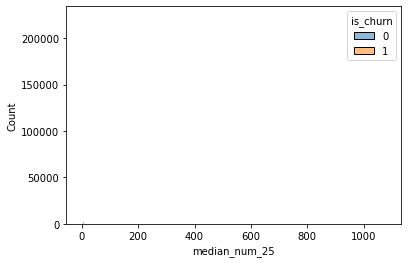

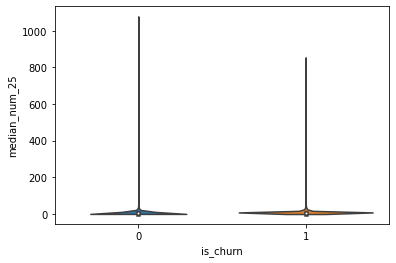

plotting q25_num_25


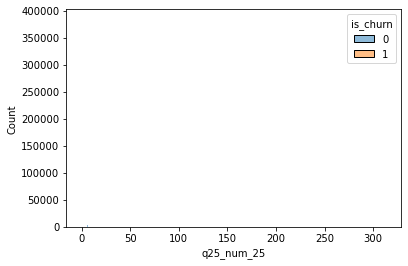

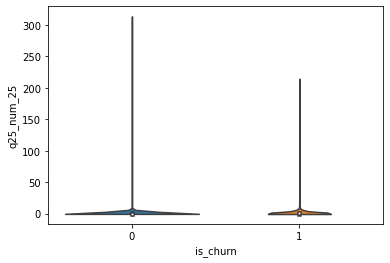

plotting q75_num_25


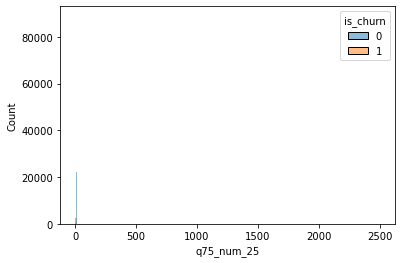

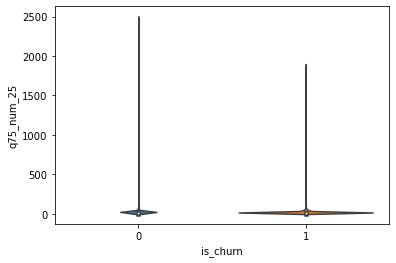

plotting std_num_25


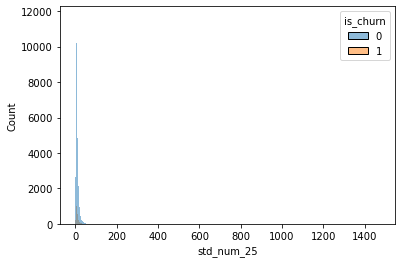

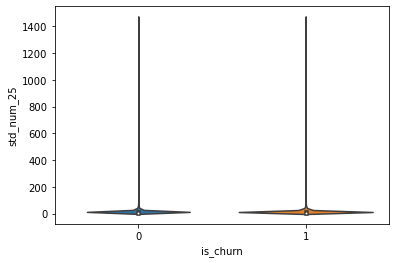

plotting median_num_50


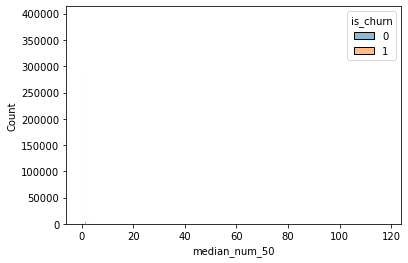

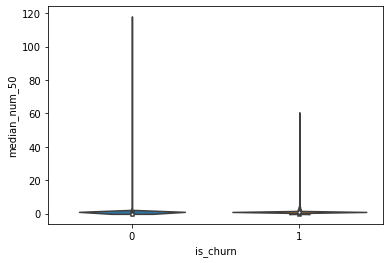

plotting std_num_50


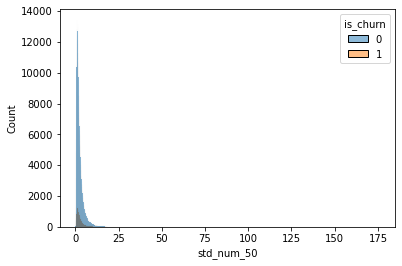

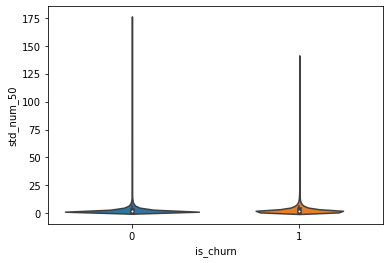

plotting median_num_75


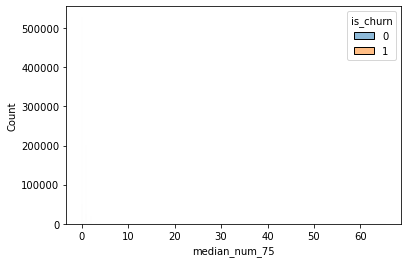

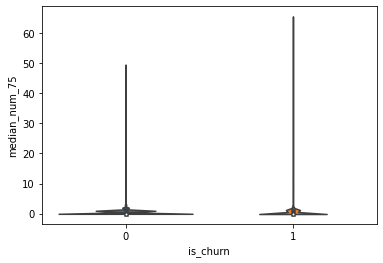

plotting std_num_75


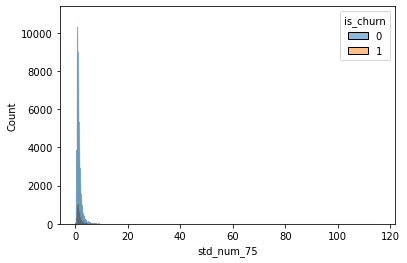

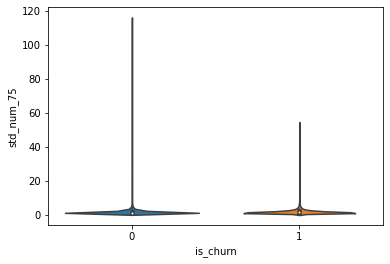

plotting median_num_985


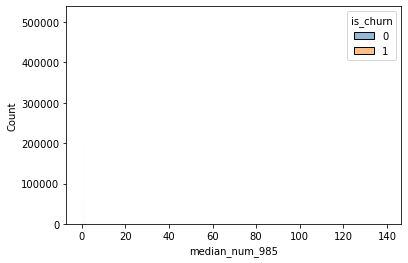

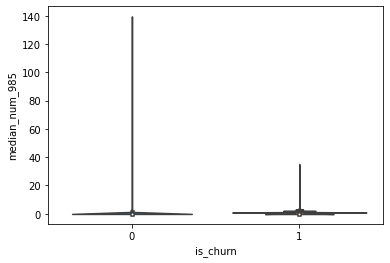

plotting std_num_985


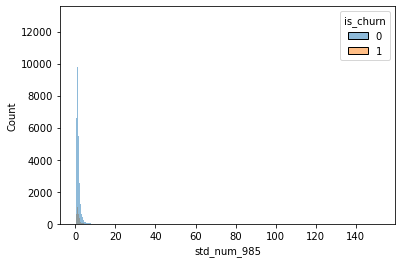

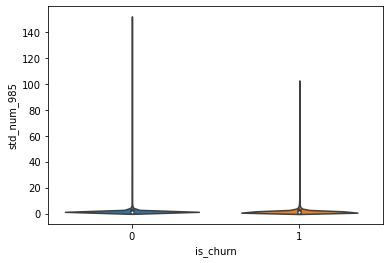

plotting mean_num_100


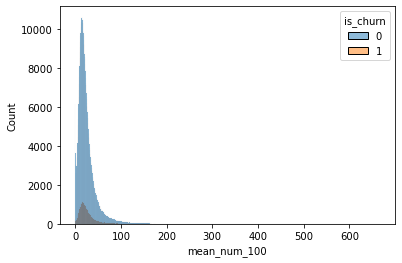

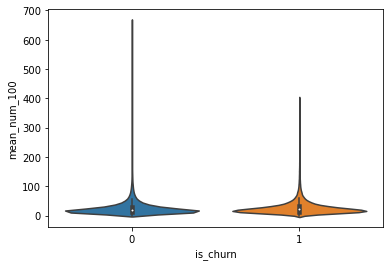

plotting median_num_100


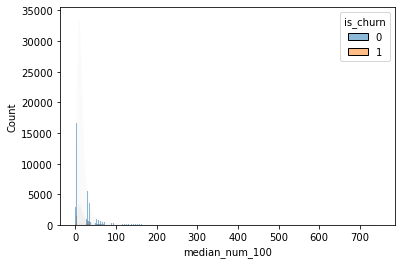

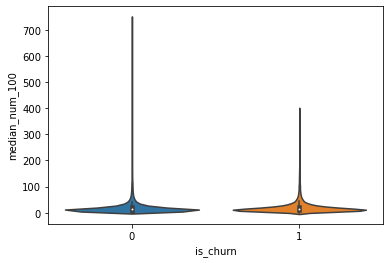

plotting q25_num_100


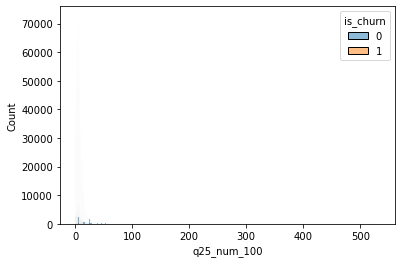

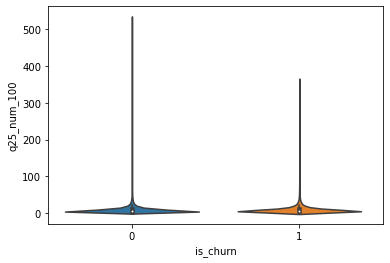

plotting q75_num_100


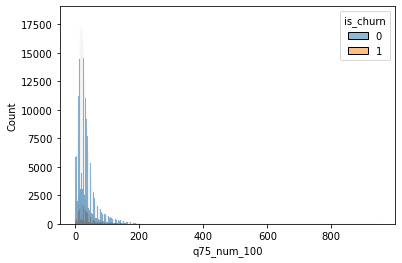

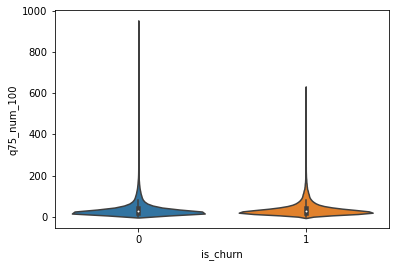

plotting std_num_100


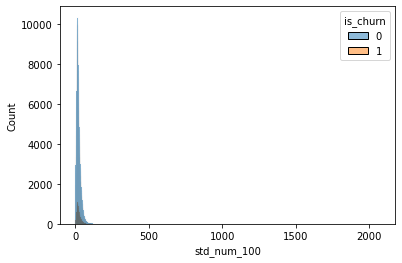

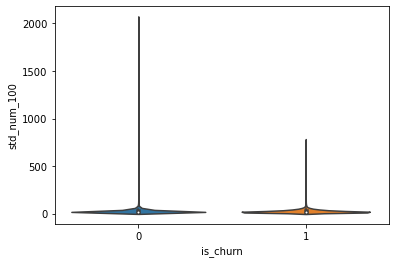

plotting median_tot_secs


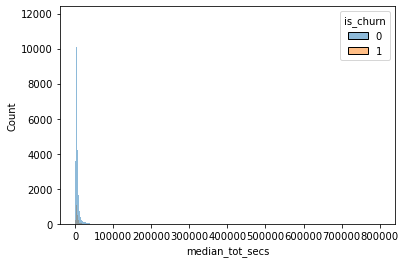

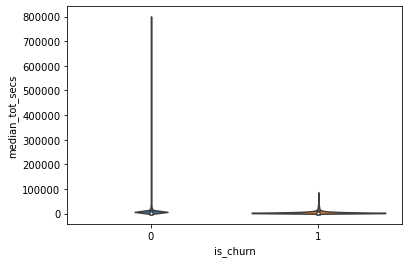

plotting q25_tot_secs


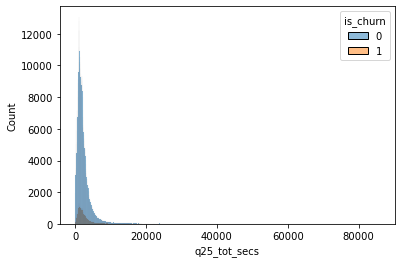

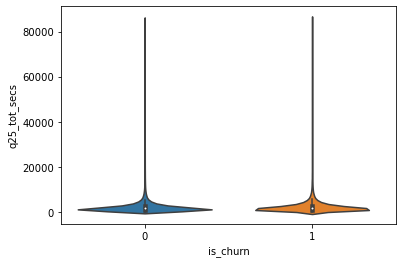

plotting q75_tot_secs


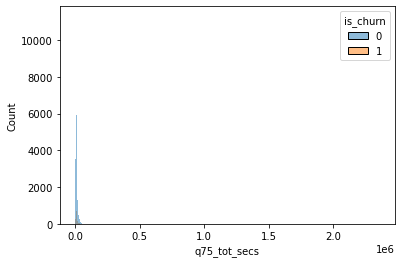

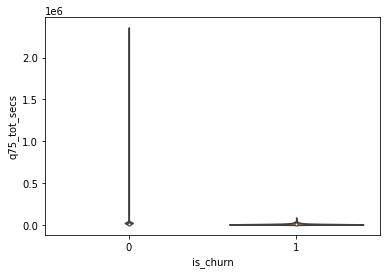

plotting n_max_break


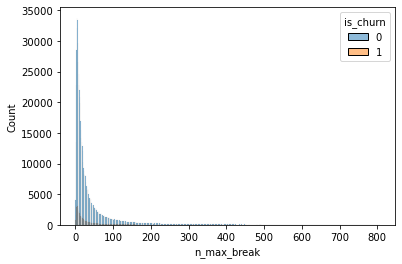

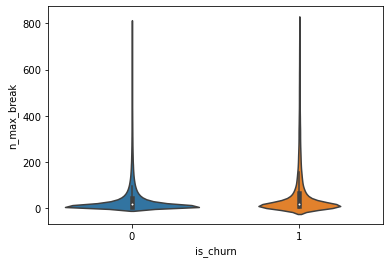

plotting n_min_break


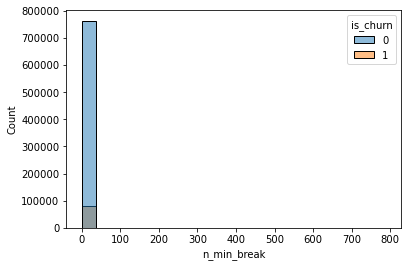

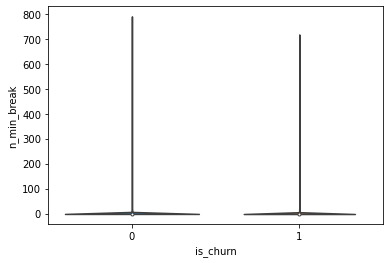

plotting n_mean_break


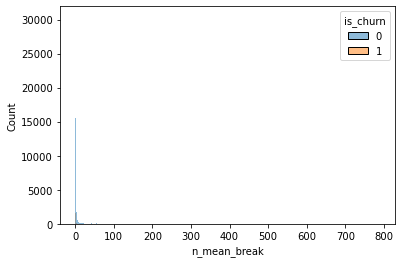

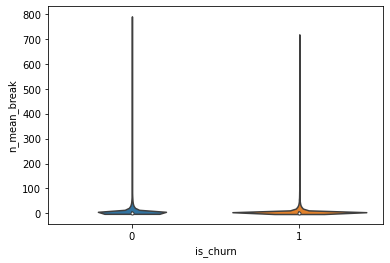

plotting n_mode_break


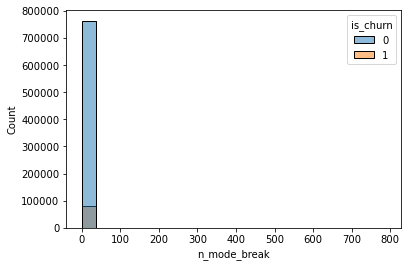

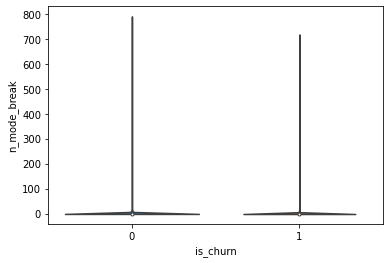

plotting n_median_break


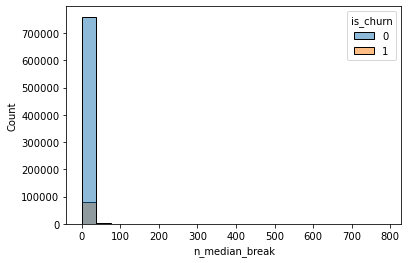

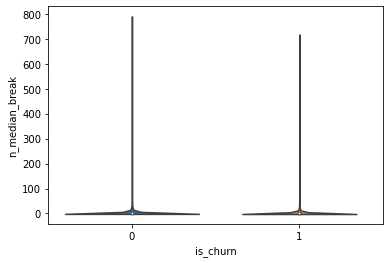

plotting n_max_break_last


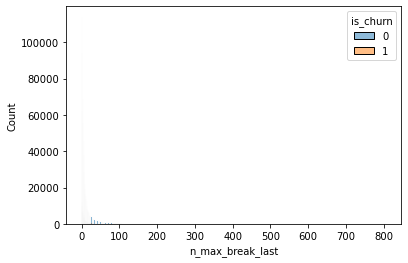

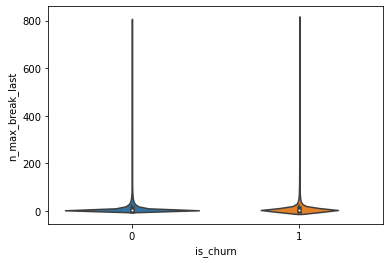

plotting n_min_break_last


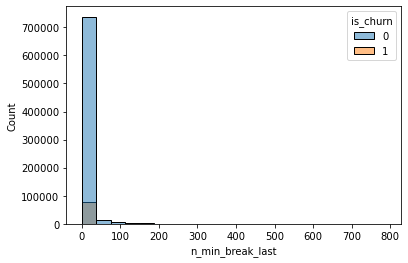

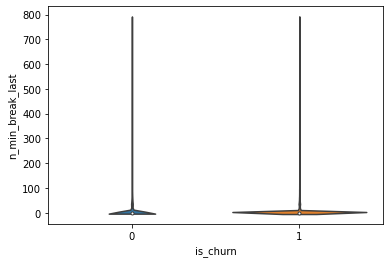

plotting n_mean_break_last


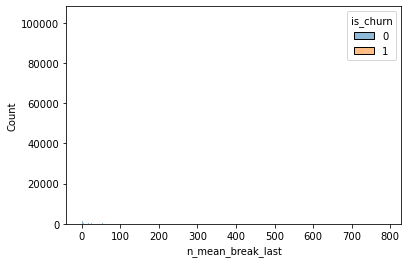

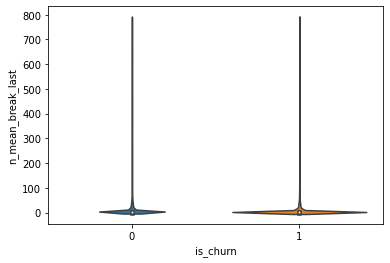

plotting n_mode_break_last


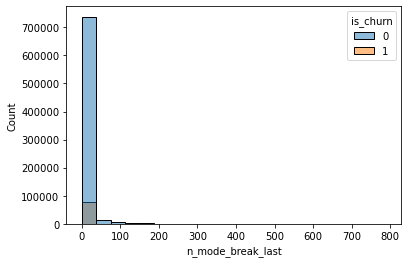

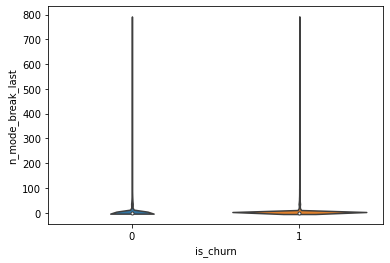

plotting n_median_break_last


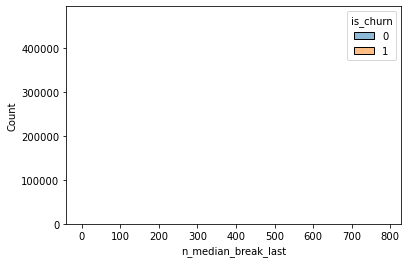

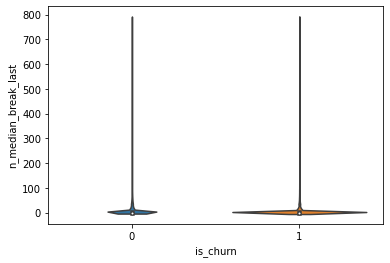

plotting total_num_transaction


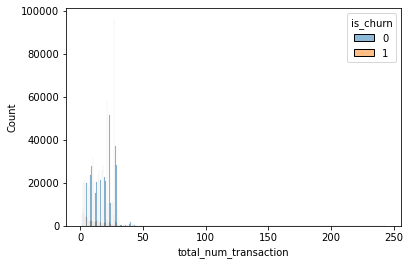

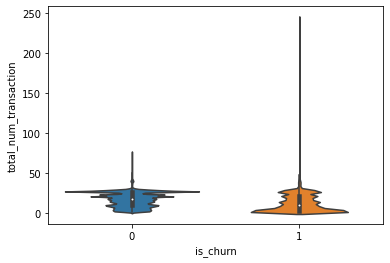

plotting min_amount_paid


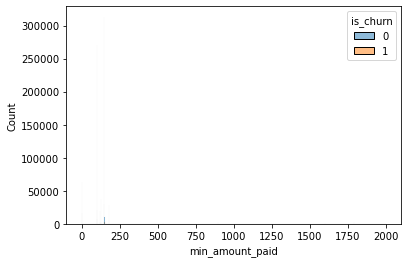

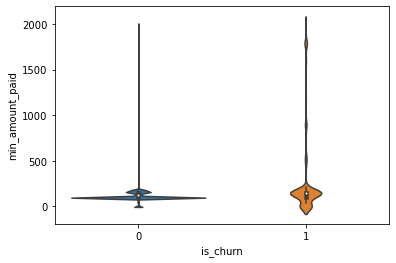

plotting max_amount_paid


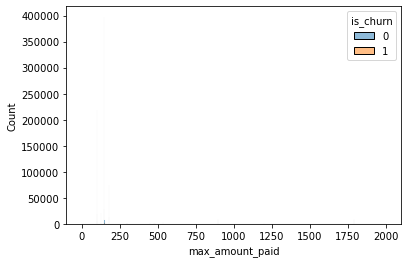

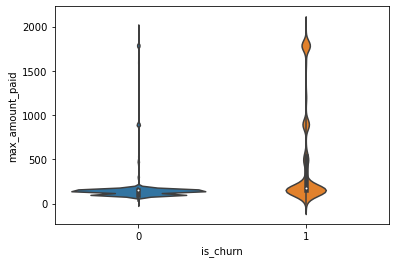

plotting mean_amount_paid


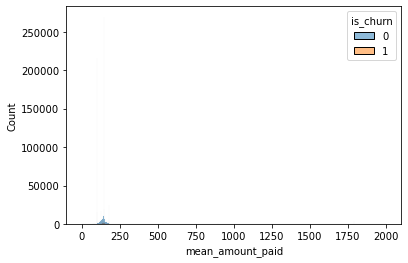

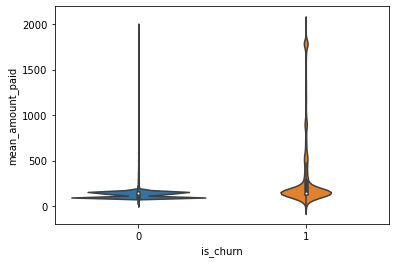

plotting median_amount_paid


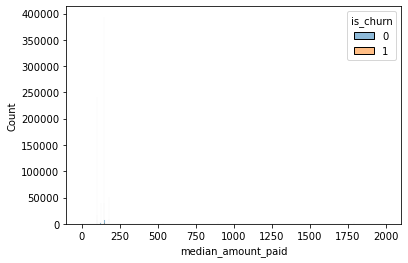

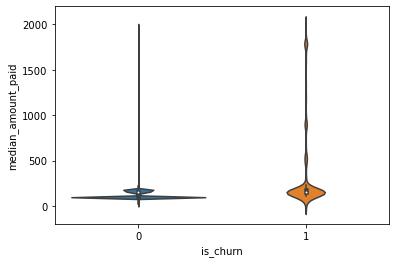

plotting mode_amount_paid


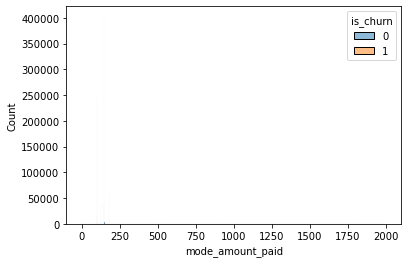

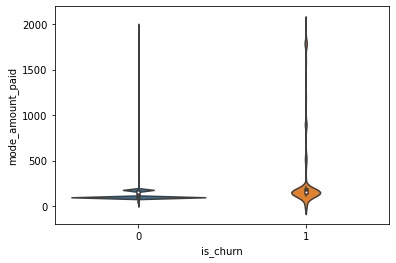

plotting total_amount_paid


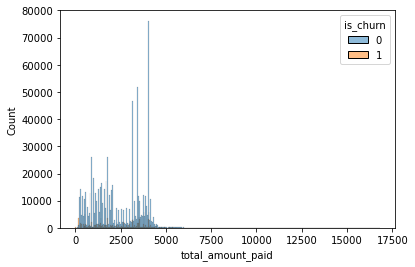

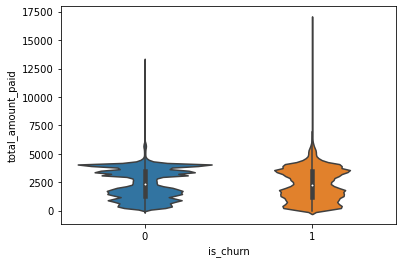

plotting total_plan_list_price


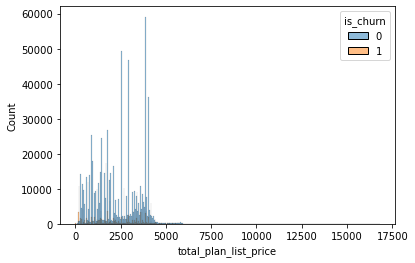

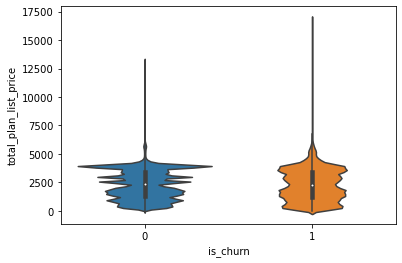

plotting mean_plan_list_price


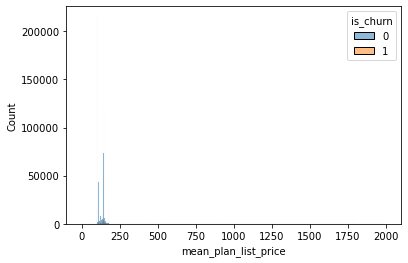

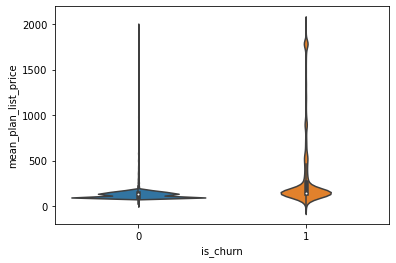

plotting median_plan_list_price


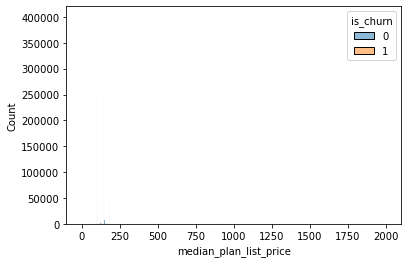

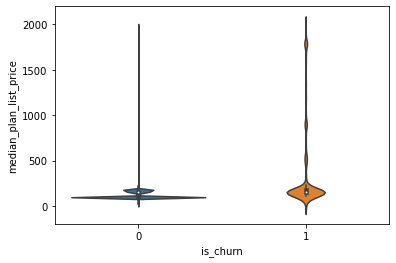

plotting mode_plan_list_price


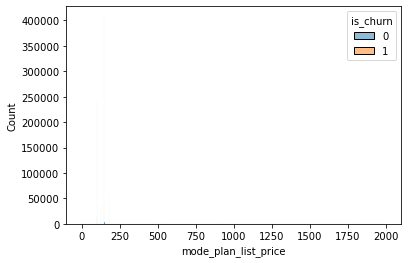

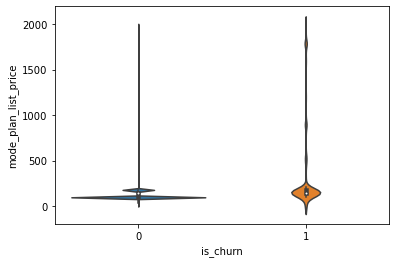

plotting num_payment_methods


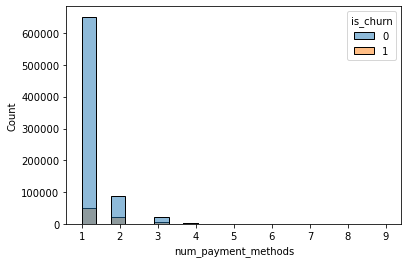

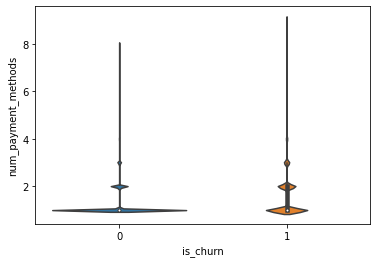

plotting mode_payment_method_id


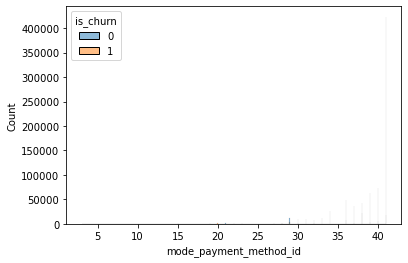

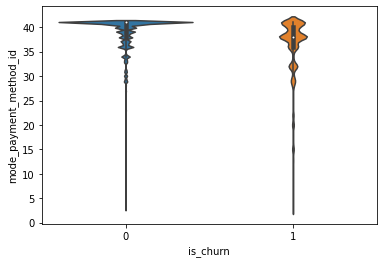

plotting sum_payment_plan_days


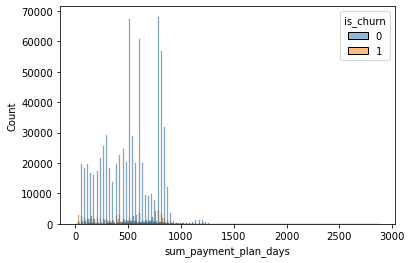

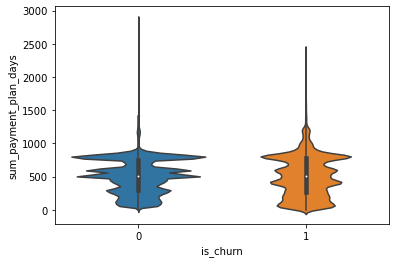

plotting min_payment_plan_days


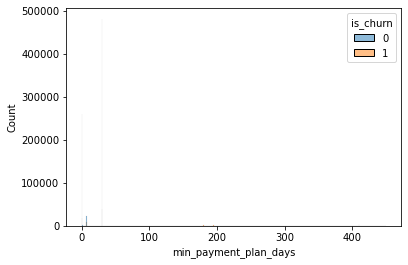

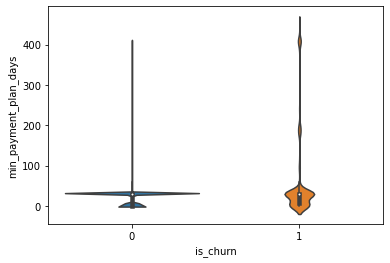

plotting max_payment_plan_days


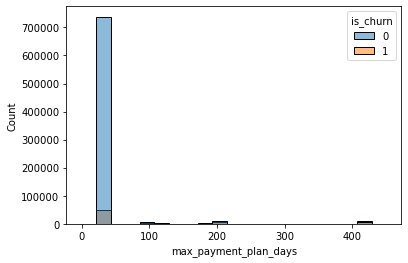

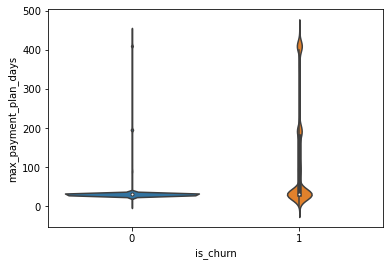

plotting mean_payment_plan_days


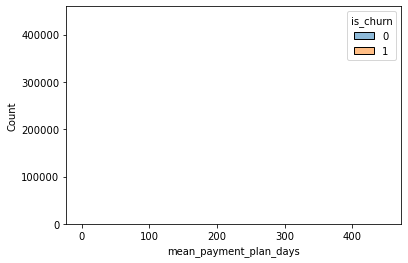

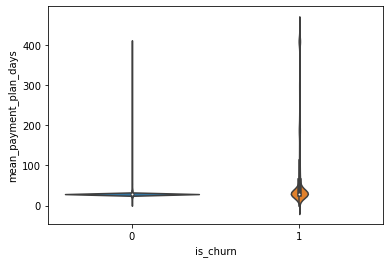

plotting mode_payment_plan_days


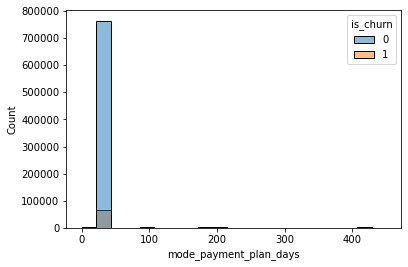

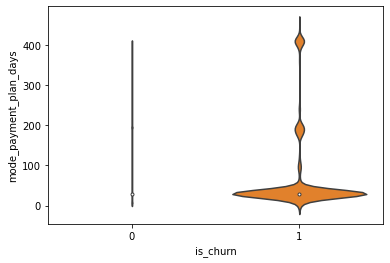

plotting num_payment_plans


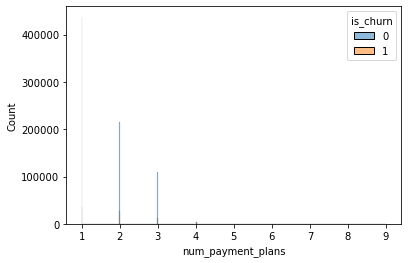

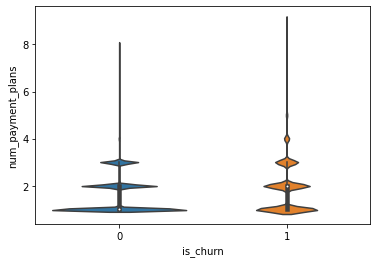

plotting total_auto_renew


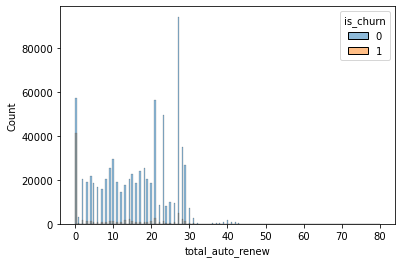

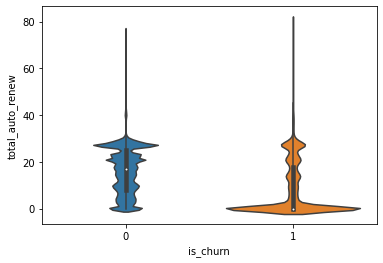

plotting total_is_cancel


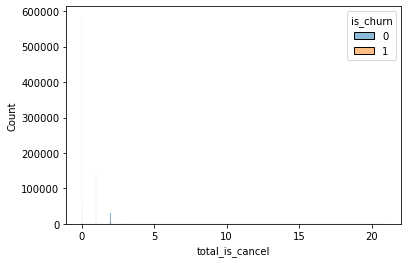

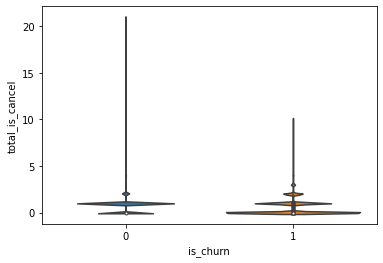

plotting duration_max_memb_exp_min_trans_date


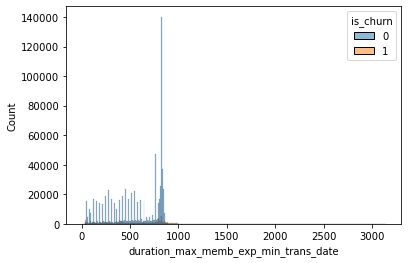

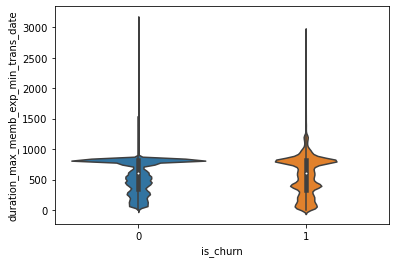

plotting duration_max_min_trans_date


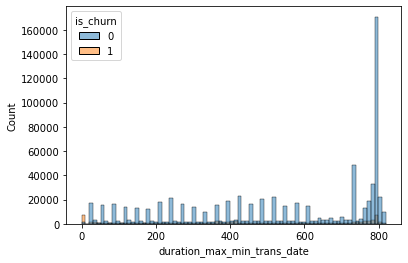

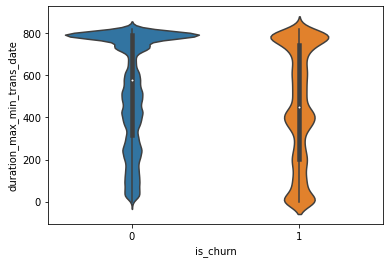

plotting sum_delta_members_exp_prev_trans_date


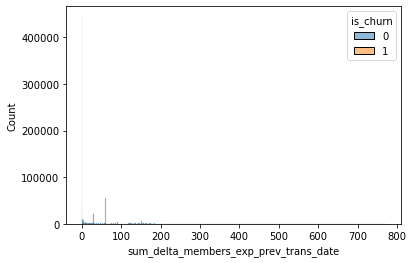

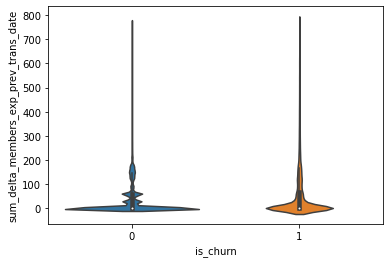

plotting num_breaks_members_exp_trans


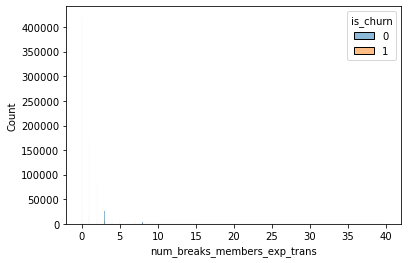

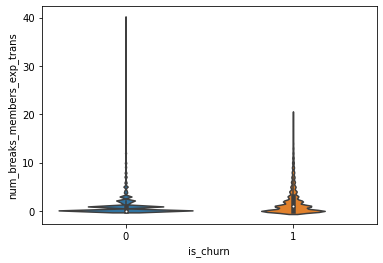

plotting num_breaks_30plus_days


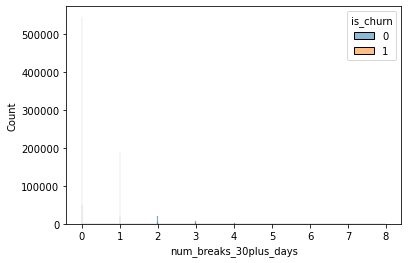

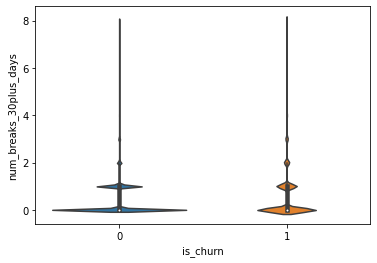

plotting min_delta_members_exp_prev_trans_date


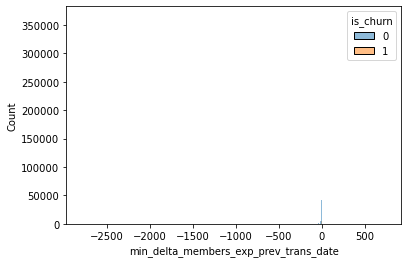

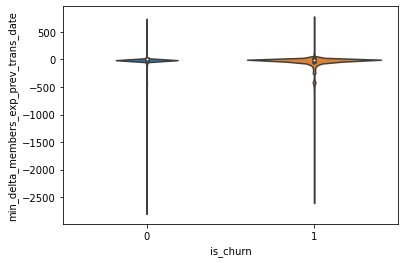

plotting max_delta_members_exp_prev_trans_date


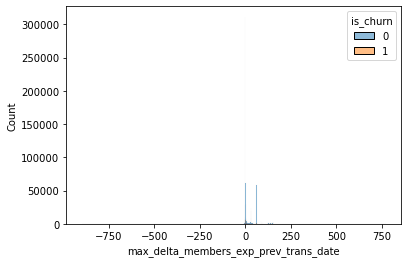

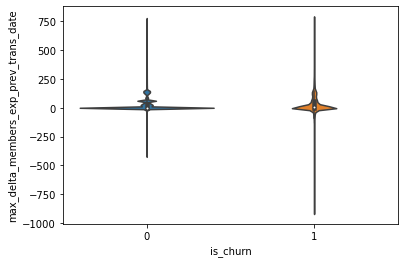

plotting mean_delta_members_exp_prev_trans_date


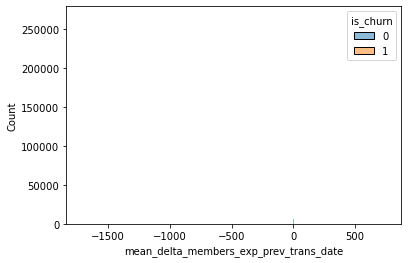

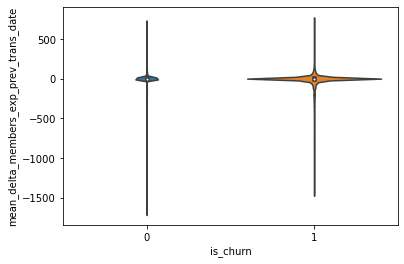

plotting median_delta_members_exp_prev_trans_date


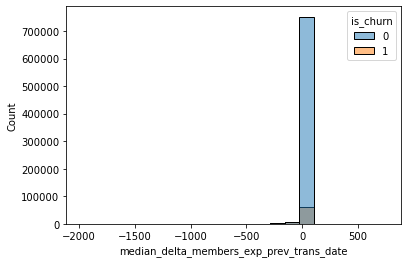

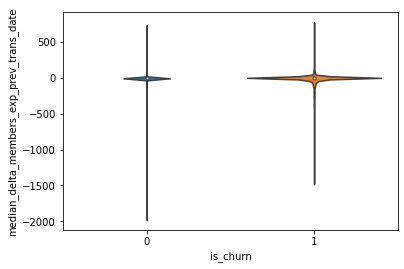

plotting mode_delta_members_exp_prev_trans_date


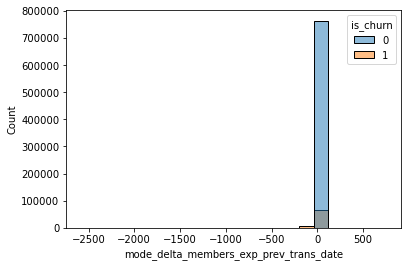

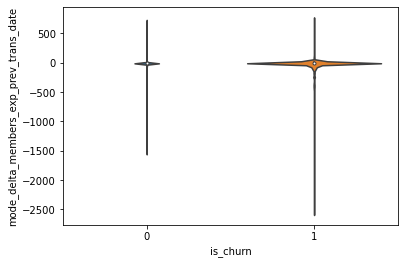

plotting min_delta_trans_date


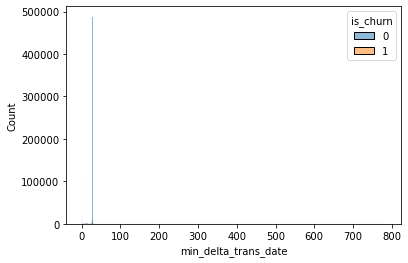

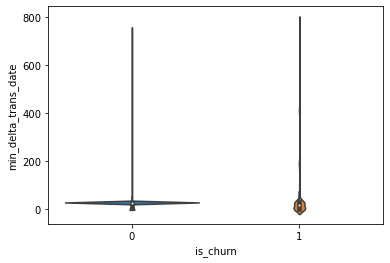

plotting max_delta_trans_date


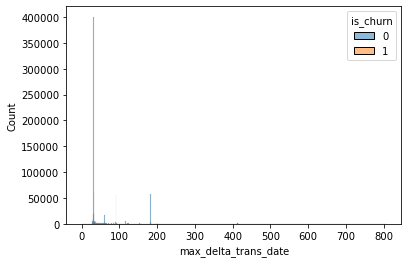

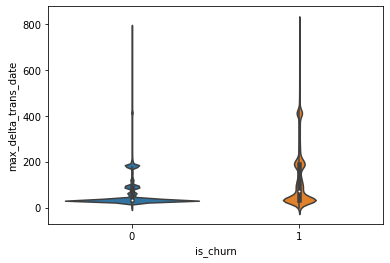

plotting mean_delta_trans_date


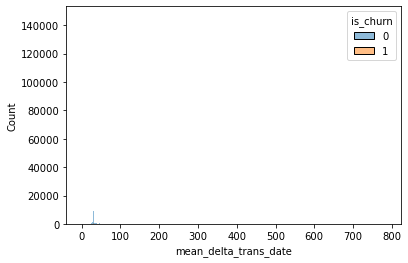

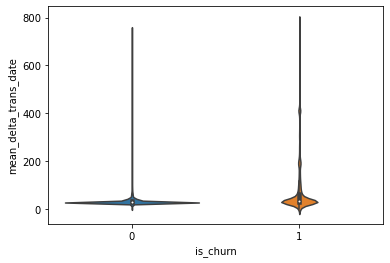

plotting median_delta_trans_date


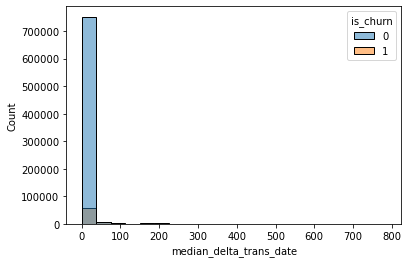

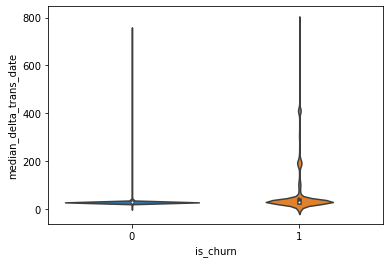

plotting mode_delta_trans_date


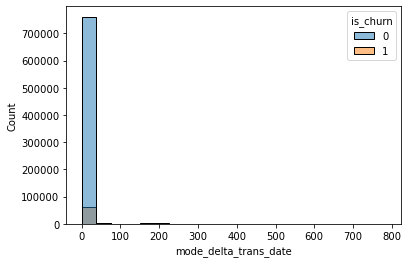

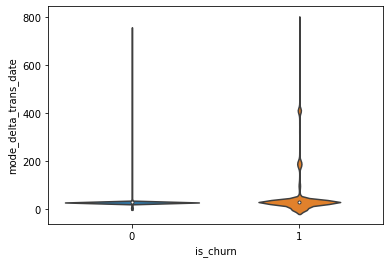

plotting min_delta_amount_paid


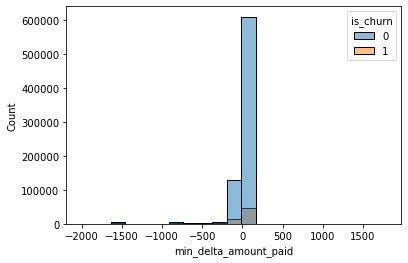

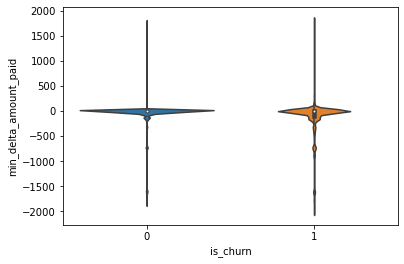

plotting max_delta_amount_paid


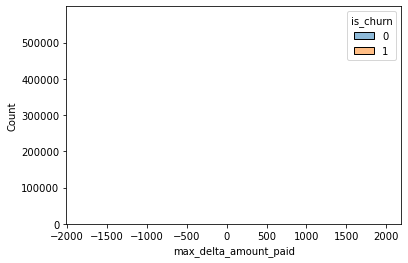

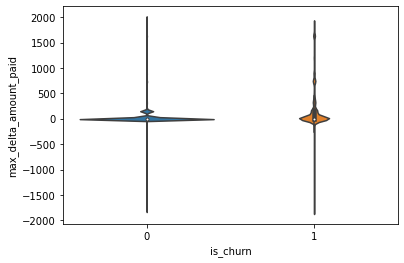

plotting mode_delta_amount_paid


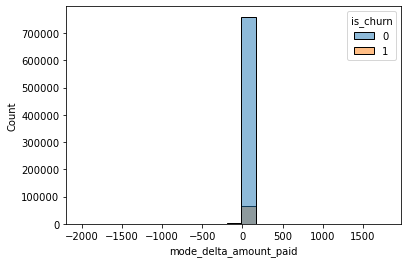

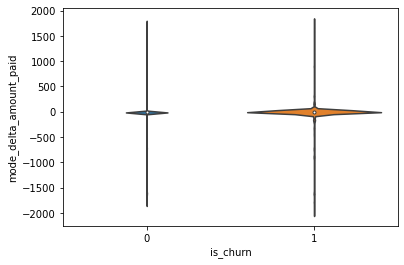

plotting duration_max_memb_exp_min_trans_date_effective


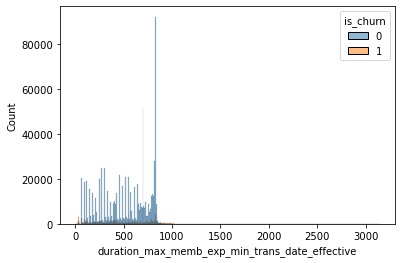

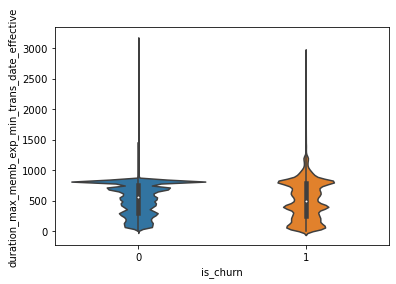

plotting is_churn


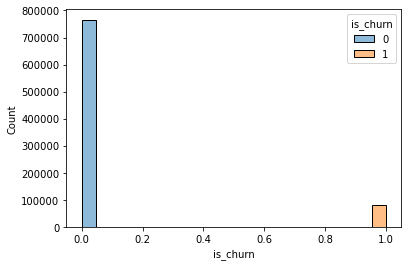

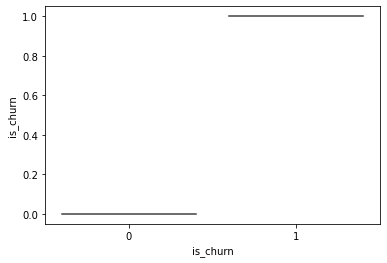

In [41]:
from pandas.api.types import is_numeric_dtype

df_plot=df_user_all_info_agg_for_model.drop(columns=['max_date_trans',
                                                 'min_date_trans','max_memb_exp','last_date_active',
                                                 'registration_init_time','registration_init_time_as_dt',
                                                 'last_auto_renew_transaction','first_auto_renew_transaction',
                                                 'last_cancel_membership_expire_date',
                                                 'first_cancel_membership_expire_date','last_auto_renew_transaction'])

df_sel=df_plot[df_plot['n_active_days']>1]

for col in df_sel.columns:
    #max_paid_date_break_in_days
    if is_numeric_dtype(df_sel[col]):
        print("plotting",col)
        sns.histplot(hue="is_churn", x=col, data=df_sel,alpha=0.5)
        plt.show()
        #sns.violinplot(x="Segment_FM", y=df_user_cat_imp["min_paid_date_break_in_days"], data=df_user_cat_imp[df_user_cat_imp["pay_duration_in_days"]!=0])ab
        sns.violinplot(x="is_churn", y=df_sel[col], data=df_sel)
        plt.show()

In [ ]:
#next try excluding 5 % or 10 % of outliers before modelling